In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('darkgrid')
mpl.rcParams['figure.figsize'] = [18,10]

### Basics of k-means clustering

### Why k-means clustering?
- A critical drawback of hierarchical clustering: runtime
- K means runs significantly faster on large datasets

### Step 1: Generate cluster centers
```python
kmeans(obs, k_or_guess, iter, tresh, check_finite)
```
- `obs`: standardized observations
- `k_or_guess`: number of clusters
- `iter`: number of iterations (default: 20)
- `thres`: theshold(default: 1e-50)
- `check_finite`: whether to check if observations contain only finite numbers (default: True)
Returns two objects: cluster centers, distortion

### Step 2: Generate cluster labels
```python
vq(obs, code_book, check_finite=True)
```
- `obs`: standardized observations
- `code_book`: cluster centers
- `check_finite`: whether to check if observations contain only finite numbers (default: True)
Returns two objects: a list of cluster labels, a list of distortions

### A note on distortions
- `kmeans` returns a single value of distortions
- `vq` returns a list of distortions

In [3]:
x_coordinate = [17, 20, 35, 14, 37, 33, 14, 30, 35, 17, 11, 21, 13, 10, 81, 84, 87, 83, 90, 97, 94, 88, 89, 93, 92, 82, 81, 92, 91, 22, 23, 25, 25, 27, 17, 17]
y_coordinate = [  4,   6,   0,   0,   4,   3,   1,   6,   5,   4,   6,  10,   8, 10,  97,  94,  99,  95,  95,  97,  99,  99,  94,  99,  90,  98, 100,  93,  98,  15,  10,   0,  10,   7,  17,  15]

In [4]:
from scipy.cluster.vq import whiten
comic_con = pd.DataFrame({'x_coordinate': x_coordinate,
                          'y_coordinate': y_coordinate,
                          'x_scaled': whiten(x_coordinate),
                          'y_scaled': whiten(y_coordinate)})

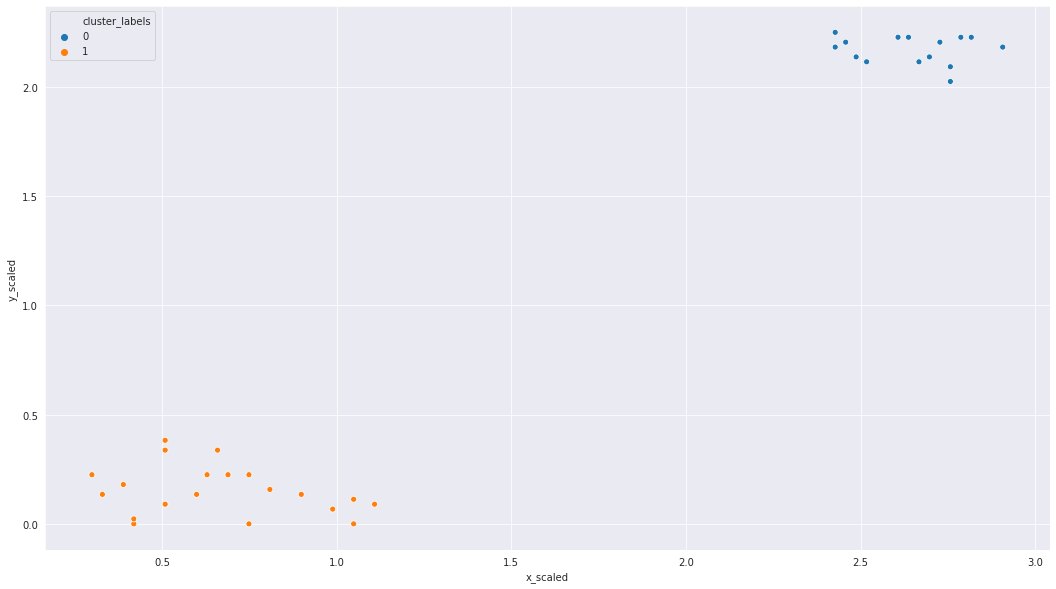

In [5]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

### How to find th right *k*?
- No *absolute* method to find right number of clusters (k) in k-means clustering
- Elbow method

### Distortions revisited 
- Distortion: sum of squared distances of points from cluster centers
- Decreases with an increasing number of clusters
- Becomes zero when the number of clusters equals the number of points
- Elbow plot: line plot between cluster centers and distortion

### Elbow method
- Elbow plot: plot th numer of clusters and distortion
- Elbow plot helps indicate number of clusters present in data

### Elbow method in Python

In [6]:
# Declaring variables for use
distortions = []

num_clusters = range(1, 7)

In [7]:
# Populating distortions for various clusters
for i in num_clusters:
    centroids, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

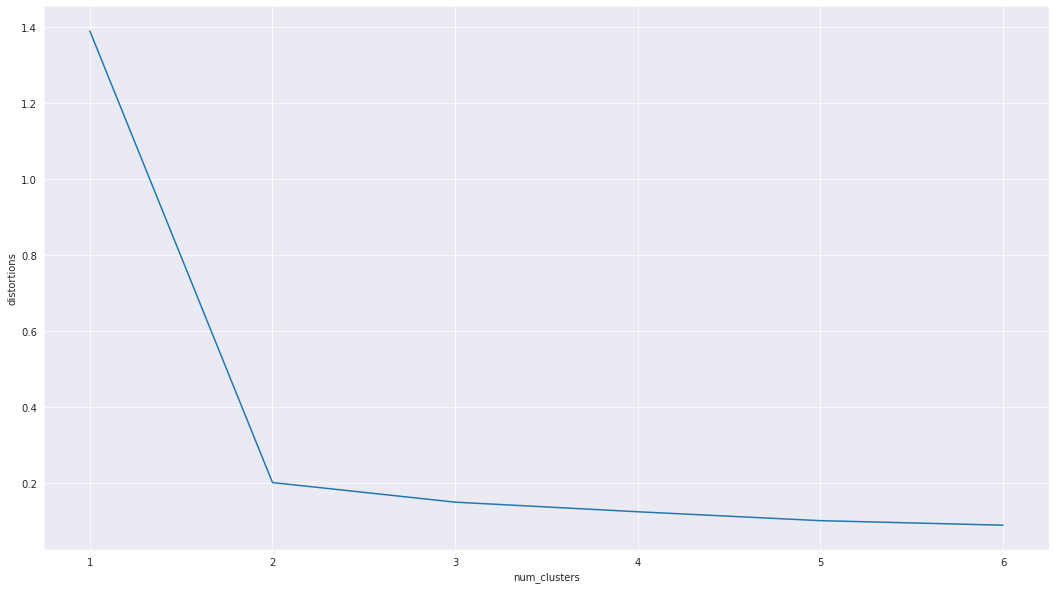

In [8]:
# Plotting elbow plot data
elbow_plot = pd.DataFrame({'num_clusters': num_clusters,
                               'distortions': distortions})

sns.lineplot(x='num_clusters', y='distortions',
            data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

### Final thoughts on using the elbow method
- Only gives an indication of optimal k (number of clusters)
- Does not always pinpoint how many k (number of clusters)
- Other methods: average silhouette and gap statistic

In [9]:
x = [39, 42, 58, 43, 13, 32, 60, 13, 26, 27, 29, 51, 14, 50, 62, 59, 
     50, 62, 65, 17, 25, 45, 55, 48, 42, 58, 68, 58, 37, 55]
y = [39, 42, 58, 43, 13, 32, 60, 13, 26, 27, 29, 51, 14, 50, 
     62, 59, 50, 62, 65, 17, 25, 45, 55, 48, 42, 58, 68, 58, 37, 55]

uniform_data = pd.DataFrame({'x': x, 'y': y, 'x_scaled': whiten(x), 'y_scaled': whiten(y)})

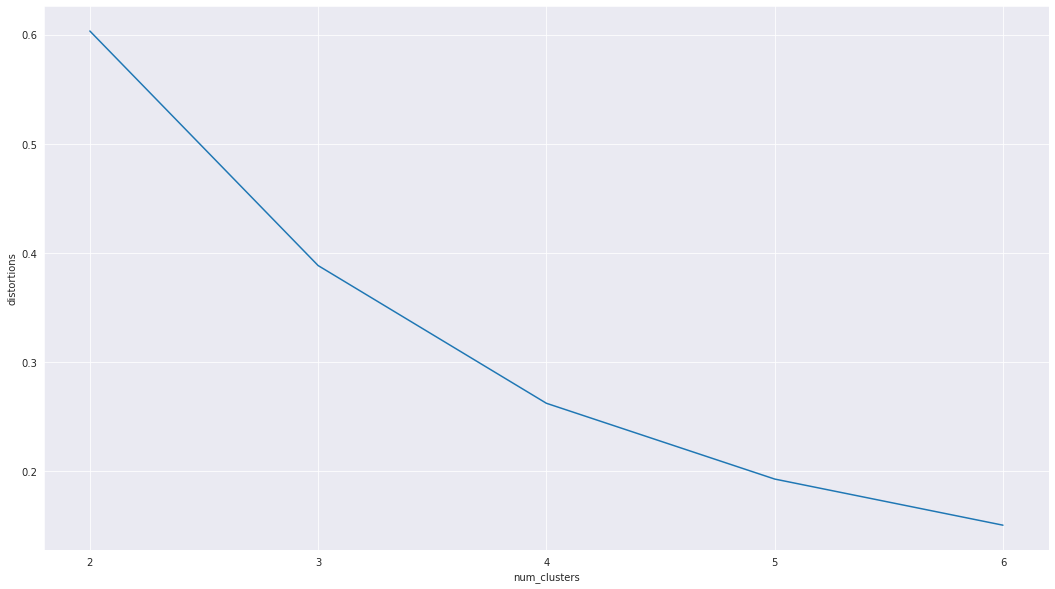

In [10]:
distortions = []
num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data[['x_scaled','y_scaled']], i)
    distortions.append(distortion)

# Create a data frame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

### Limits of k-means clustering
- How to find the right K (number of clusters)?
- Impact of seeds
- Biased towards equal sized clusters

### Impact of seeds

![seeds](data/seeds.png)

### Uniform clusters in k-means

![uniform](data/uniform.png)

### Final thoughts 
- Each technique has its pros and cons
- Consider your data size and patterns before deciding on alogorithm
- Clustering is an exploratory phase of analysis

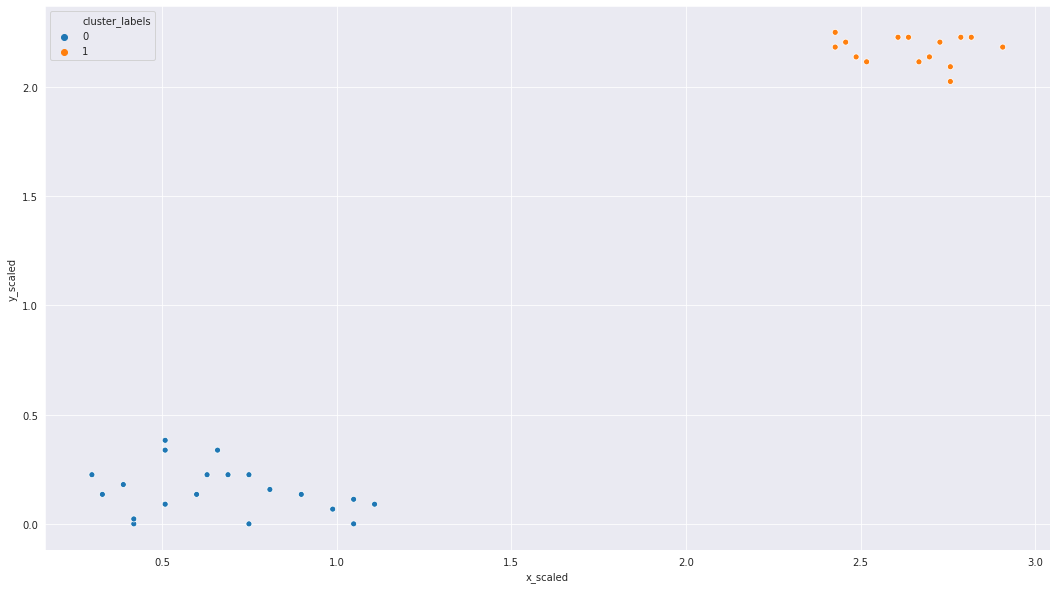

In [11]:
# Import random class
from numpy import random

# Initialize seed
random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

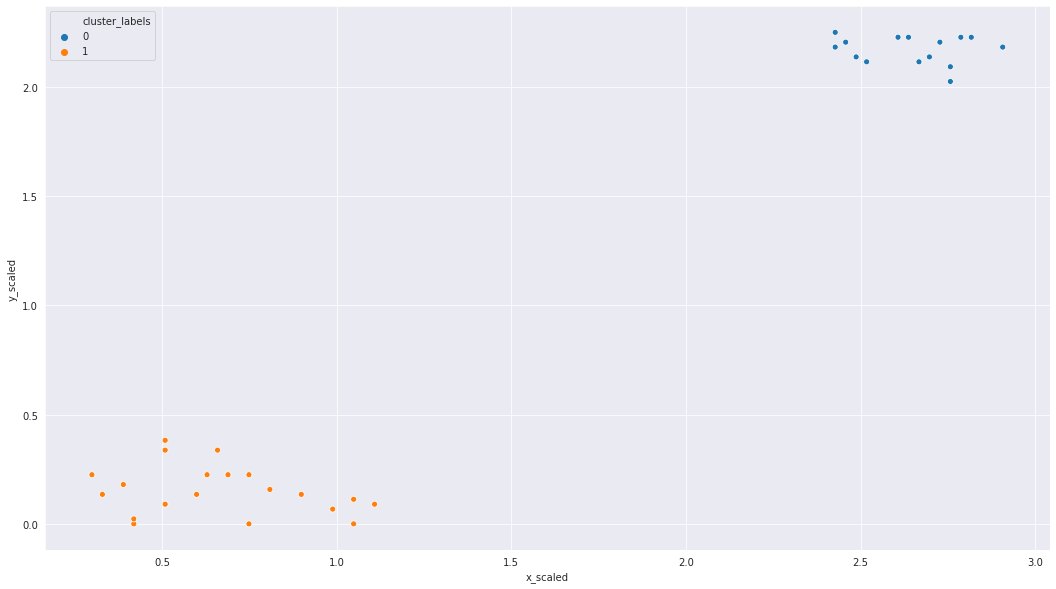

In [12]:
# Import random class
from numpy import random

# Initialize seed
random.seed([1,2,1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

In [13]:
x = [33.875528010208775, 38.208747889149606, 35.740587879668375, 32.54696342954206, 62.06314582832662, 53.769683890896005, 32.49035021952977, 55.3252017626829, 68.10254176198403, 53.283123547122216, 67.71803005072717, 32.845502853646536, 61.78083409365266, 62.072467329911454, 37.2423104965403, 48.39279681160971, 35.48978845302275, 65.60854565818534, 38.02888393506392, 65.49367503080025, 41.60372438786939, 48.41398475297436, 41.81966990296046, 51.769182700772454, 45.179950587632945, 38.02218596797351, 56.37185205882892, 52.05250382127925, 44.24373638076516, 40.33281190433085, 53.59657550320356, 45.872652957168775, 54.000011702824835, 52.6886879008935, 53.25422917515853, 63.54212627168273, 65.38884629108937, 49.7331204244559, 48.58080531427996, 48.03000662249777, 44.667125096576456, 65.30935895573465, 40.58584806552085, 43.935337781568315, 32.873749638659994, 43.17638645624066, 61.44735547191348, 47.902126357633676, 47.572750544262746, 50.65221646915222, 45.446521013813914, 48.17757170967687, 50.11893027842959, 37.33082580526986, 53.28605844737083, 32.606017427486364, 46.59545711595761, 54.91413224060491, 61.18758173081231, 62.25623799525337, 47.807103448547345, 65.44265167099898, 36.17446484734976, 60.90339817677179, 44.238116884086224, 40.34232188761509, 57.1991023845528, 36.08806304674293, 35.56663866798864, 42.41968176650849, 59.65269146405017, 32.624629292084094, 55.802169917560185, 65.49918670396143, 45.54670963865595, 61.005369016634205, 58.19939103997329, 63.119317713784035, 55.317083131439325, 45.609472159593864, 45.63141644596187, 46.74818574516722, 68.2835242879107, 61.96714674680341, 48.961046192567, 45.37856387981091, 50.841168640885435, 52.56595620799083, 39.13493120568782, 48.991763726168436, 58.05200857676577, 41.37122590593515, 64.3514005533457, 35.02226785177038, 48.60847434578881, 42.6486493170514, 57.584951487904185, 49.08107020583896, 51.426592405160875, 62.315517190744416, 26.840752816458078, 26.951941203374947, 32.5621398164603, 27.108845406070458, 20.77972887648475, 34.64864231015485, 27.334714397277274, 38.63528805644043, 27.362780877847065, 22.25173068139633, 23.561817911734813, 28.6834020635391, 33.84077612867423, 28.223160262959322, 38.08583937546411, 29.88562783705242, 28.408504942406417, 31.72078699025845, 25.21073980042423, 28.676889274075087, 32.248620751649284, 26.387527137544257, 28.699010037068682, 26.075497431739343, 34.287109826660135, 24.026824037174762, 30.83187786615126, 32.37571558869186, 22.76230802134732, 35.251223510448035, 70.1823912319945, 79.58988481728986, 65.72716493320895, 68.48339899780753, 76.4135846784469, 79.26874522519233, 64.84182258980695, 71.11774101770646, 78.34020407876903, 63.61846310591197, 67.53968320798616, 69.1508780470645, 67.79213380348288, 76.87140430526, 62.00437158352073, 67.49125960815724, 71.90747912630009, 65.27576084118527, 77.58529514762616, 79.66066417912315, 77.32463519764799, 68.5790017971886, 65.9764957476465, 71.55575552204994, 69.83671682593541, 70.4943218813415, 72.62743438217248, 67.66970193136962, 63.44559188910216, 75.45783601312209]
y = [44.89342094946078, 41.11632695012222, 57.41800587821296, 57.21808248658115, 47.19694447881652, 35.9519591663506, 42.0218536061098, 52.548322206341886, 52.31212455866878, 31.63628689308561, 47.605248069586594, 54.23496141308666, 60.824987602248825, 65.23558661122223, 48.237577085508796, 67.52456486435298, 54.10211413900534, 51.8513512002574, 39.82817720810414, 44.28386899368546, 60.21348801168716, 45.355137861258946, 35.81066078526795, 56.95992181229278, 61.05673695261803, 44.34557019681759, 49.53371077686823, 57.76601797690635, 41.7427565034216, 52.07742896956642, 55.58701182345966, 43.81629666563168, 61.46690780645113, 44.3775923583563, 44.722751130263774, 47.98225455002846, 47.73690085784043, 46.049823776856826, 56.78708412569725, 56.60380297058407, 61.716042124809185, 56.52781556973503, 45.81317068292476, 49.107768819361304, 41.14505631914088, 64.84595736862047, 62.46952021318698, 58.299124711890485, 48.533208073849394, 48.79467674278415, 40.65821117776538, 30.466588286384656, 65.1805398242621, 41.73000679928131, 69.24321762302908, 56.00106984258167, 39.63738121453994, 38.404587085375475, 39.63915234786564, 38.73957077928137, 36.00996935366802, 45.627290421255125, 57.17020664932346, 51.32130044599607, 40.89880525190646, 41.15484687210742, 58.21497749474327, 43.45728537166188, 42.722747180257315, 39.27124659372834, 42.66172394093738, 57.407147546037336, 34.25546896017839, 61.2946118575901, 30.513927856422505, 65.03769516099436, 63.378856912574534, 62.926205725335116, 35.88019396665801, 52.89656062679065, 37.259020806758414, 31.67028002331956, 47.16555533297543, 50.8823970375166, 41.77975390328266, 49.38557057141355, 52.58865855257825, 40.89034885614024, 65.91171887261399, 46.57669291055369, 63.5556821473357, 45.45012239907503, 43.705265331740556, 46.58949706968058, 38.91660455701806, 55.46764508050404, 67.89462117284727, 36.02362380728002, 59.985360625320176, 54.70049854246623, 82.72356822426191, 77.9444363345605, 75.40050306769567, 68.91634077469779, 72.84274950158657, 74.71747015717696, 70.61496974587016, 76.12679437605598, 80.60280864557596, 70.19696261830036, 68.23133122814531, 83.83579386727436, 83.97371742515891, 70.71122298781704, 72.22425104319395, 79.61715461567954, 74.81720151229194, 81.28549433293101, 79.839476126322, 82.54505219682139, 72.41216493735487, 74.60395650171206, 68.84261456484317, 73.28936759848196, 80.51600556553831, 82.6396572856646, 66.38754731793188, 73.35737436223333, 72.53759838415348, 73.71960774659767, 78.16166533096742, 75.99349930565272, 67.237386284613, 82.50606008627572, 77.72556254117448, 73.68057342677461, 83.33967752728628, 84.67897397759208, 71.78110971610965, 68.1659101899457, 83.8792565462558, 74.22367681669748, 78.1526834527262, 74.21207006805605, 75.13106435618263, 77.71960453281291, 71.08256275442666, 74.66344797163669, 80.35559980446331, 73.34017066404198, 70.12614603304121, 77.46797550765935, 77.65232497035855, 76.70948616089562, 73.94355101042667, 71.19864360817556, 76.4341868745873, 70.62890953003463, 78.5744388997699, 68.4489350236011]
mouse = pd.DataFrame({'x': x, 'y': y, 'x_scaled': whiten(x), 'y_scaled': whiten(y)})

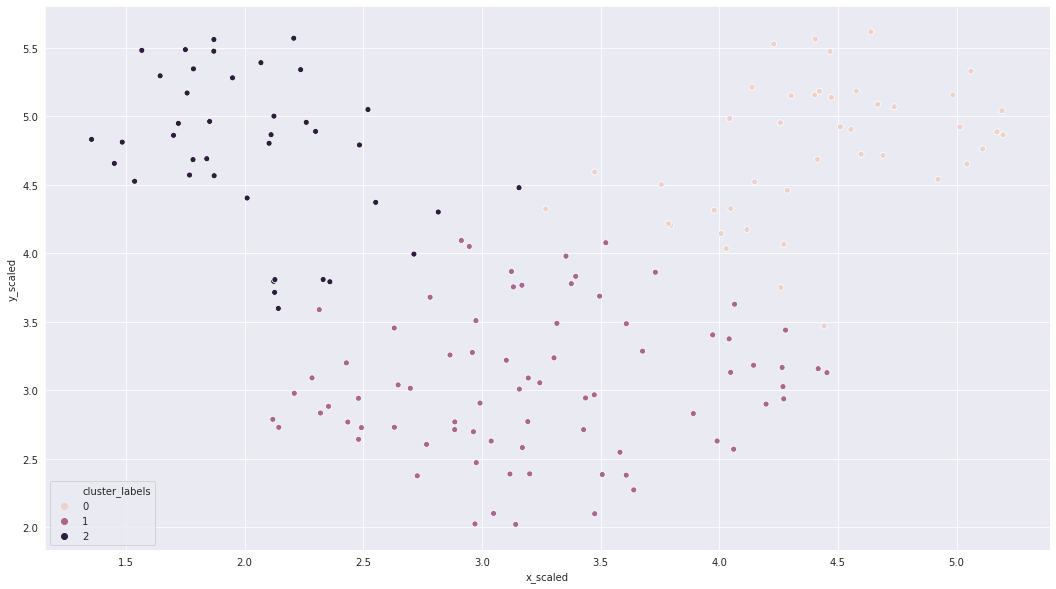

In [14]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(mouse[['x_scaled', 'y_scaled']], 3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse[['x_scaled','y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = mouse)
plt.show()

In [20]:
fifa = pd.read_csv('data/fifa_18_sample_data.csv')
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])

Index(['ID', 'name', 'full_name', 'club', 'club_logo', 'special', 'age',
       'league', 'birth_date', 'height_cm',
       ...
       'prefers_lwb', 'prefers_ls', 'prefers_lf', 'prefers_lam', 'prefers_lcm',
       'prefers_ldm', 'prefers_lcb', 'prefers_gk', 'scaled_def', 'scaled_phy'],
      dtype='object', length=187)

In [21]:
random.seed([1000,2000])

In [24]:
# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'],_ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

In [26]:
# Display cluster centers 
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

                scaled_def  scaled_phy
cluster_labels                        
0                 1.948298    7.163234
1                 3.817844    9.020452
2                 2.072803    9.066327


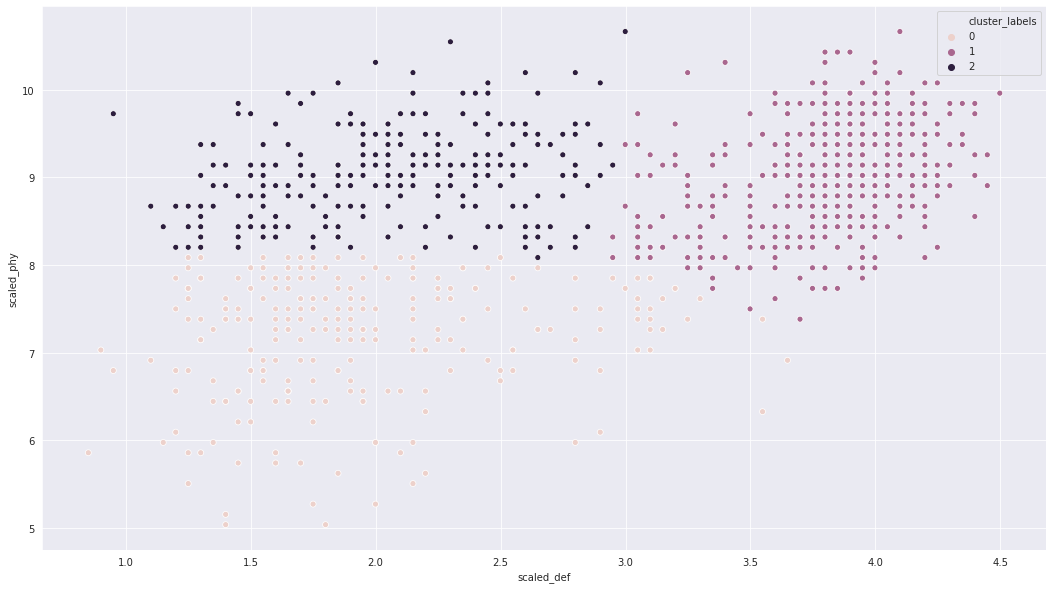

In [28]:
# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)
plt.show()